In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
scrobbles_df = pd.read_csv("artists_data.csv")

In [88]:
scrobbles_df_pivoted = scrobbles_df.pivot(values="Scrobbles", index="Artist", columns="Month")
scrobbles_df_pivoted

Month,April,August,February,January,July,June,March,May,October,September
Artist,,,,,,,,,,
Ariana Grande,78,78,150,45,52,59,146,52,40,18
Billie Eilish,12,28,0,0,76,35,3,38,9,33
Camila Cabello,19,15,38,5,9,16,26,33,7,5
Charli XCX,12,27,16,4,38,42,26,26,55,90
Little Mix,46,47,94,55,25,51,120,34,13,6
Taylor Swift,292,365,300,90,233,184,267,150,178,203


In [90]:
taylor_swift = scrobbles_df[scrobbles_df.Artist == "Taylor Swift"]
ariana_grande = scrobbles_df[scrobbles_df.Artist == "Ariana Grande"]
camila_cabello = scrobbles_df[scrobbles_df.Artist == "Camila Cabello"]
little_mix = scrobbles_df[scrobbles_df.Artist == "Little Mix"]
billie_eilish = scrobbles_df[scrobbles_df.Artist == "Billie Eilish"]
charli_xcx = scrobbles_df[scrobbles_df.Artist == "Charli XCX"]

# Visualizing using Matplotlib

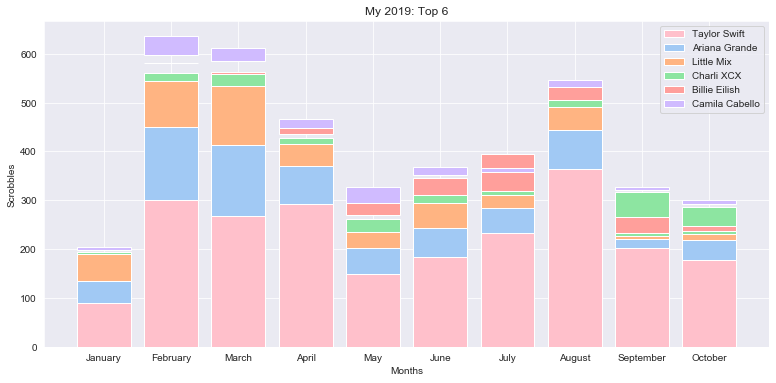

In [98]:
plt.figure(figsize=(13, 6))

bottom1 = np.add(np.array(taylor_swift.Scrobbles), np.array(ariana_grande.Scrobbles))
bottom2 = np.add(bottom1, np.array(little_mix.Scrobbles))
bottom3 = np.add(bottom2, np.array(camila_cabello.Scrobbles))
bottom4 = np.add(bottom3, np.array(charli_xcx.Scrobbles))

plt.bar(taylor_swift.Month, taylor_swift.Scrobbles, color="pink", label="Taylor Swift")
plt.bar(ariana_grande.Month, ariana_grande.Scrobbles, label="Ariana Grande", bottom=taylor_swift.Scrobbles)
plt.bar(little_mix.Month, little_mix.Scrobbles, label="Little Mix", bottom=bottom1)
plt.bar(charli_xcx.Month, charli_xcx.Scrobbles, label="Charli XCX", bottom=bottom2)
plt.bar(billie_eilish.Month, billie_eilish.Scrobbles, label="Billie Eilish", bottom=bottom3)
plt.bar(camila_cabello.Month, camila_cabello.Scrobbles, label="Camila Cabello", bottom=bottom4)


plt.title("My 2019: Top 6")
plt.xlabel("Months")
plt.ylabel("Scrobbles")

plt.legend()
plt.show()

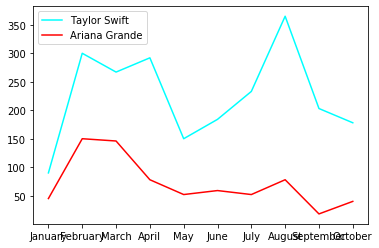

In [50]:
plt.close("all")
plt.plot(taylor_swift.Month, taylor_swift.Scrobbles, color="aqua", label='Taylor Swift')
plt.plot(ariana_grande.Month, ariana_grande.Scrobbles, color="red", label="Ariana Grande")

plt.legend(loc='best')
plt.show()

# Visualizing using Seaborn

In [51]:
data_array = np.genfromtxt("artists_data.csv", delimiter=",", dtype="str")

In [52]:
taylor_swift_array = data_array[1:11, 2:].astype("int").flatten()
taylor_swift_array

array([ 90, 300, 267, 292, 150, 184, 233, 365, 203, 178])

In [53]:
ariana_grande_array = data_array[11:, 2:].astype(int).flatten()
ariana_grande_array

array([ 45, 150, 146,  78,  52,  59,  52,  78,  18,  40,   0,   0,   3,
        12,  38,  35,  76,  28,  33,   9])

In [104]:
np_df = pd.DataFrame({
    "Month": taylor_swift.Month,
    "Taylor Swift": taylor_swift.Scrobbles.tolist(),
    "Ariana Grande": ariana_grande.Scrobbles.tolist(),
    "Little Mix": little_mix.Scrobbles.tolist(),
    "Charli XCX": charli_xcx.Scrobbles.tolist(),
    "Billie Eilish": billie_eilish.Scrobbles.tolist(),
    "Camila Cabello": camila_cabello.Scrobbles.tolist()
})
np_df

,Month,Taylor Swift,Ariana Grande,Little Mix,Charli XCX,Billie Eilish,Camila Cabello
0,January,90,45,55,4,0,5
1,February,300,150,94,16,0,38
2,March,267,146,120,26,3,26
3,April,292,78,46,12,12,19
4,May,150,52,34,26,38,33
5,June,184,59,51,42,35,16
6,July,233,52,25,38,76,9
7,August,365,78,47,27,28,15
8,September,203,18,6,90,33,5
9,October,178,40,13,55,9,7


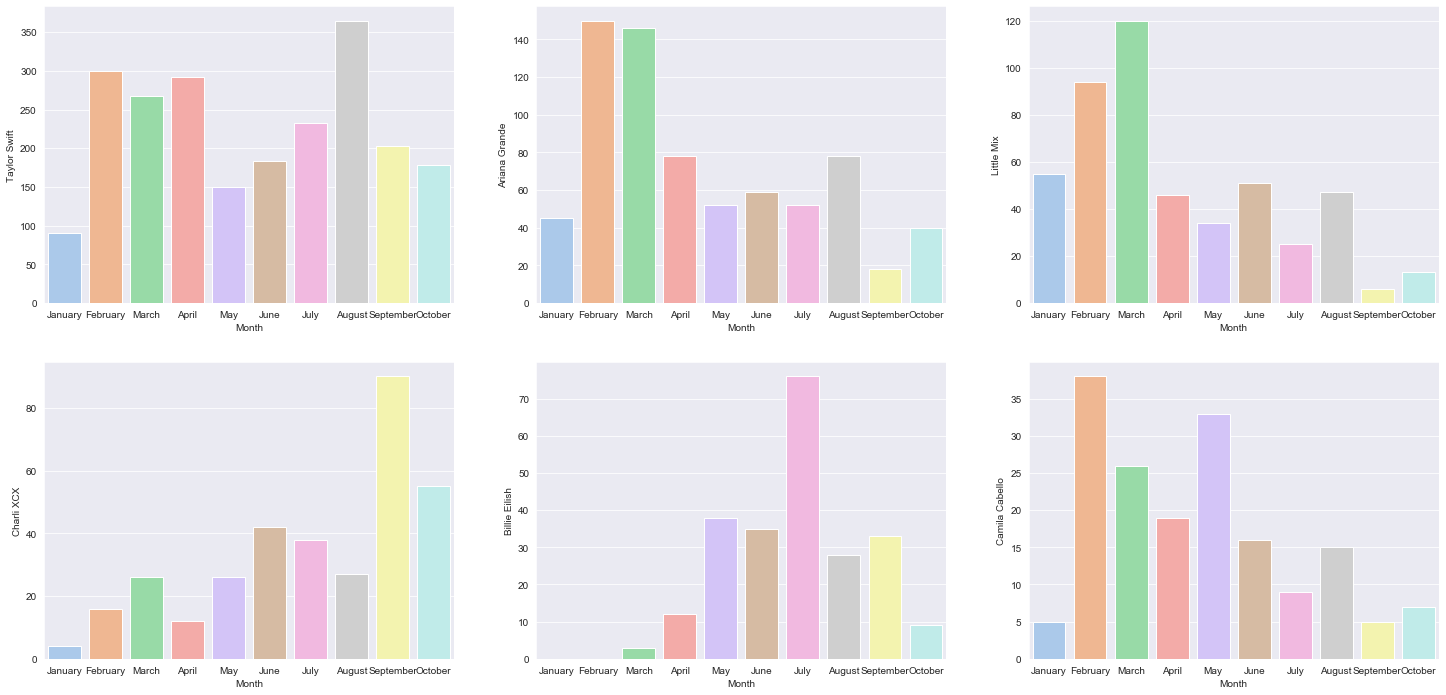

In [111]:
plt.figure(figsize=(25, 12))
plt.subplot(2, 3, 1)
sns.barplot(x="Month", y="Taylor Swift", data=np_df)

plt.subplot(2, 3, 2)
sns.barplot(x="Month", y="Ariana Grande", data=np_df)

plt.subplot(2, 3, 3)
sns.barplot(x="Month", y="Little Mix", data=np_df)

plt.subplot(2, 3, 4)
sns.barplot(x="Month", y="Charli XCX", data=np_df)

plt.subplot(2, 3, 5)
sns.barplot(x="Month", y="Billie Eilish", data=np_df)

plt.subplot(2, 3, 6)
sns.barplot(x="Month", y="Camila Cabello", data=np_df)

plt.savefig("an_image.jpg")

plt.show()

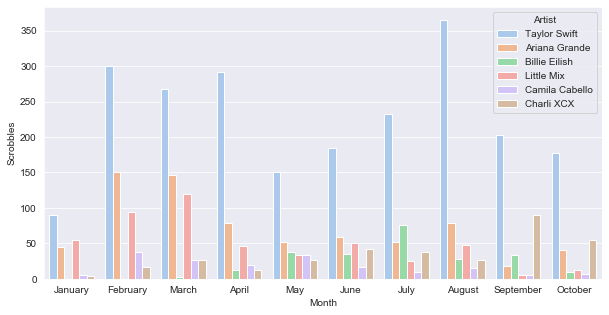

In [99]:
sns.set_style("darkgrid")
sns.set_palette("pastel")
plt.figure(figsize=(10, 5))

sns.barplot(x="Month", y="Scrobbles", data=scrobbles_df, hue="Artist")
plt.show()